# Import the Fastai Library
<p>First Let's import the Fastai library</p>

In [31]:
from fastai.vision.all import *
from fastai import *

In [32]:
x = '../input/intel-image-classification/seg_train/seg_train'
path = Path(x)
path.ls()

(#6) [Path('../input/intel-image-classification/seg_train/seg_train/glacier'),Path('../input/intel-image-classification/seg_train/seg_train/sea'),Path('../input/intel-image-classification/seg_train/seg_train/forest'),Path('../input/intel-image-classification/seg_train/seg_train/street'),Path('../input/intel-image-classification/seg_train/seg_train/mountain'),Path('../input/intel-image-classification/seg_train/seg_train/buildings')]

In [33]:
fns = get_image_files(path)
fns

(#14034) [Path('../input/intel-image-classification/seg_train/seg_train/glacier/1153.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/18566.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/16493.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/18657.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/4276.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/12401.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/1947.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/9201.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/16345.jpg'),Path('../input/intel-image-classification/seg_train/seg_train/glacier/2826.jpg')...]

In [36]:
scenes = DataBlock(blocks=(ImageBlock,CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(),
                   item_tfms=Resize(224),
                  )

In [37]:
dls = scenes.dataloaders(path)

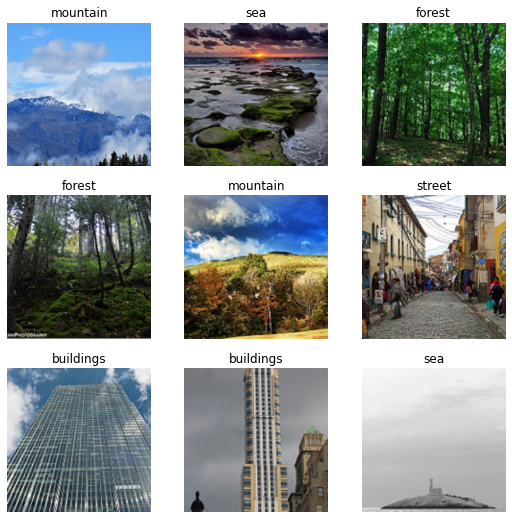

In [38]:
dls.valid.show_batch()

In [39]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)

In [40]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.535490,0.299183,0.101568,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.297150,0.192035,0.070919,00:49
1,0.113764,0.180104,0.056308,00:50


SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=6.309573450380412e-07)

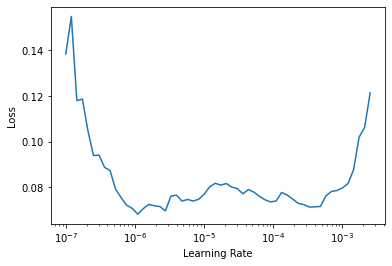

In [41]:
learn.lr_find()

In [42]:
learn.unfreeze()
learn.fit_one_cycle(5,1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.068417,0.180821,0.059515,00:50
1,0.065646,0.178561,0.055239,00:50
2,0.061246,0.181585,0.056308,00:50
3,0.054954,0.179521,0.058446,00:50
4,0.061401,0.179006,0.055952,00:50


In [43]:
learn.export() ##export the model to use later for inference

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

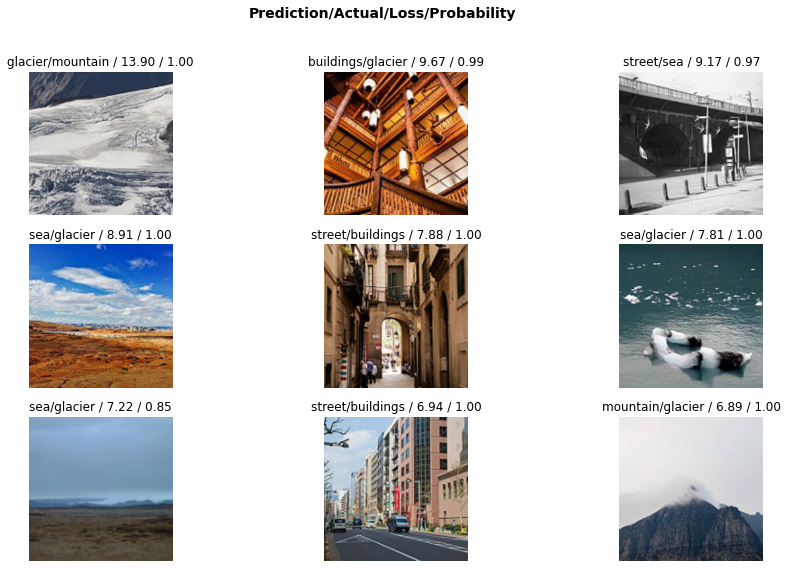

In [45]:
interp.plot_top_losses(9,figsize=(15,9))

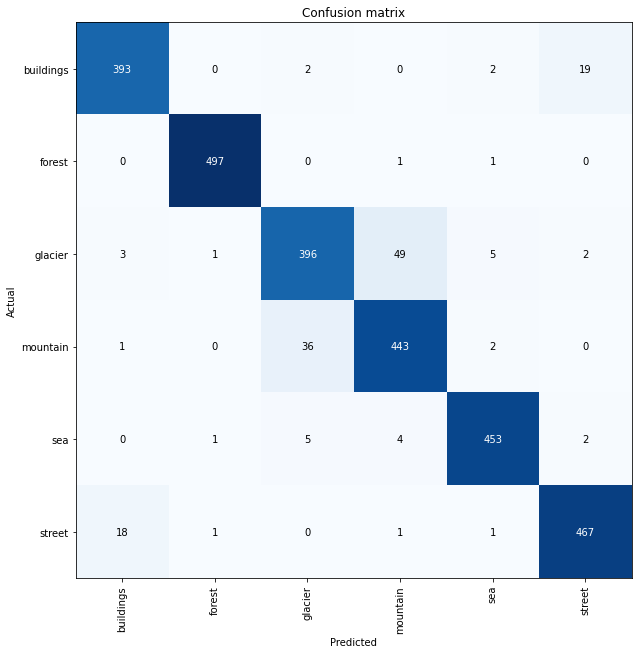

In [46]:
interp.plot_confusion_matrix(figsize=(15,9))

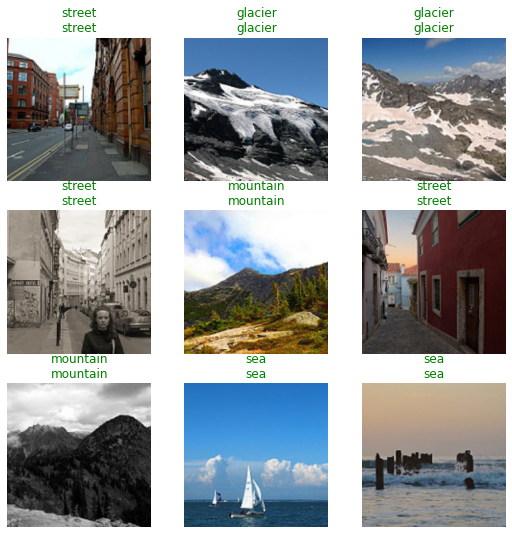

In [48]:
learn.show_results()

In [49]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

In [51]:
from fastai.vision.widgets import *

In [52]:
learn_inf = load_learner('./export.pkl',cpu=True)

In [53]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [54]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [55]:
btn_upload.observe(on_data_change, names=['data'])

In [56]:
display(VBox([widgets.Label('Select your Background!'), btn_upload, out_pl, lbl_pred]))